# 라이브러리 불러오기

In [99]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Scatter, Line, Layout

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [100]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 100)

pandas version:  1.1.3


## 한글 폰트 지정

In [101]:
plt.rc('font', family='AppleGothic')
plt.rc("axes", unicode_minus = False)

# 디스플레이 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [102]:
fontname = 'AppleGothic' # seaborn의 set 함수 사용할 경우 지정해줬음 
sns.set(style='whitegrid', font = fontname)

## 1. SKT텔레콤 - 재택지수데이터 프레임 살펴보기

코로나 이후 사람들이 얼마나 집에 머물러 있었는지 알아보기 위해 skt텔레콤의 '재택지수' 데이터를 불러옴.

거주지(홈) 인근 체류 시간과 기타 활동의 체류 시간을 집계해 지수화한 데이터로 지역, 성별, 연령별로 제공하고 있음.

In [103]:
# 데이터 불러오기 
home = pd.read_csv('data/1)재택활동지수_2000921.csv')
home.head()

,dt,age_cd,sex_cd,home_sido_nm,h0d0h0_dur_r,h0d0h1_dur_r,h0d1h0_dur_r,h0d1h1_dur_r,h1d0h0_dur_r,h1d0h1_dur_r,h1d1h0_dur_r,h1d1h1_dur_r
0,20181029,NaN,NaN,경상남도,0.166836,0.833054,0.467698,0.532190,0.203548,0.795637,0.407189,0.591995
1,20181029,NaN,NaN,전라북도,0.174534,0.825149,0.471113,0.528571,0.204232,0.793462,0.408986,0.588710
2,20181029,NaN,NaN,전라남도,0.173301,0.826440,0.461816,0.537923,0.210939,0.787248,0.416458,0.581742
3,20181029,NaN,NaN,충청남도,0.175661,0.823899,0.475354,0.524204,0.239265,0.758896,0.427152,0.571001
4,20181029,NaN,NaN,NaN,0.169477,0.830302,0.484912,0.514864,0.197705,0.801207,0.388608,0.610308


In [104]:
# 데이터 정보확인
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt            2772 non-null   int64  
 1   age_cd        792 non-null    float64
 2   sex_cd        198 non-null    float64
 3   home_sido_nm  1683 non-null   object 
 4   h0d0h0_dur_r  2772 non-null   float64
 5   h0d0h1_dur_r  2772 non-null   float64
 6   h0d1h0_dur_r  2772 non-null   float64
 7   h0d1h1_dur_r  2772 non-null   float64
 8   h1d0h0_dur_r  2772 non-null   float64
 9   h1d0h1_dur_r  2772 non-null   float64
 10  h1d1h0_dur_r  2772 non-null   float64
 11  h1d1h1_dur_r  2772 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 260.0+ KB


### 결측값 확인
연령대, 성별, 거주지역에서 결측치가 있는 것으로 보임

In [105]:
home.isnull().sum()

dt                 0
age_cd          1980
sex_cd          2574
home_sido_nm    1089
h0d0h0_dur_r       0
h0d0h1_dur_r       0
h0d1h0_dur_r       0
h0d1h1_dur_r       0
h1d0h0_dur_r       0
h1d0h1_dur_r       0
h1d1h0_dur_r       0
h1d1h1_dur_r       0
dtype: int64

* 원데이터를 보면 연령대별로, 성별별로, 거주지역별로 나누어 재택지수를 파악한 것으로 보임  
* 홈페이지 설명에도 축 설정이 지역별/연령별/성별로 되어있음  
* 현 데이터프레임에는 연령대별, 성별별, 거주지역별로 섞여 있는 상태임 
* 따라서 그대로 사용하면 데이터가 중복되는 일이 생길 위험이 있음

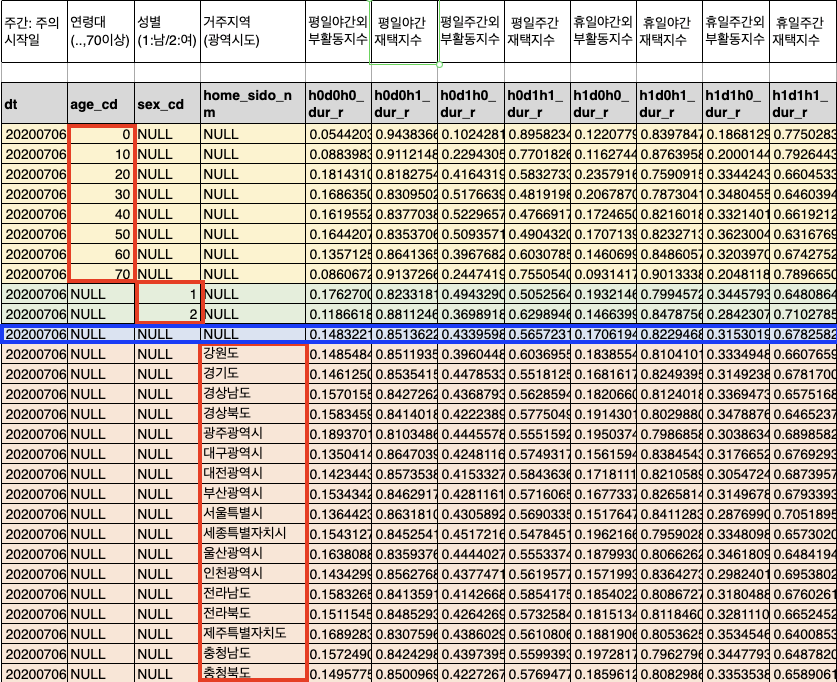

연령별은 노란색 행, 성별별은 초록색행, 시도별은 빨간색행 

파란색 행이 주간 전체 평균으로 추정됨.  
확실하다고 단정지을 수 없어  
파란색행의 개수와 기간내 주차의 수와 비교하여 파란색행이 주간 평균인지 확인해봄

### 파란색 행이 주간 전체 평균인지 확인해보는 작업

In [106]:
# 연령별, 성별, 시도별 행이 모두 NaN 인 행들만 추출
newhome = home[(home['age_cd'].isnull()) & (home['sex_cd'].isnull()) & (home['home_sido_nm'].isnull())]
newhome

,dt,age_cd,sex_cd,home_sido_nm,h0d0h0_dur_r,h0d0h1_dur_r,h0d1h0_dur_r,h0d1h1_dur_r,h1d0h0_dur_r,h1d0h1_dur_r,h1d1h0_dur_r,h1d1h1_dur_r
4,20181029,NaN,NaN,NaN,0.169477,0.830302,0.484912,0.514864,0.197705,0.801207,0.388608,0.610308
39,20181105,NaN,NaN,NaN,0.167393,0.831570,0.478517,0.520444,0.193548,0.806157,0.375405,0.624302
80,20181112,NaN,NaN,NaN,0.168209,0.831380,0.479196,0.520392,0.196675,0.803020,0.378299,0.621397
94,20181119,NaN,NaN,NaN,0.167206,0.832517,0.477306,0.522416,0.191222,0.808450,0.357341,0.642333
129,20181126,NaN,NaN,NaN,0.167841,0.831863,0.477450,0.522253,0.189658,0.809217,0.360841,0.638037
147,20181203,NaN,NaN,NaN,0.164042,0.835028,0.466982,0.532088,0.183008,0.816686,0.338413,0.661286
195,20181210,NaN,NaN,NaN,0.173408,0.826191,0.466060,0.533539,0.191402,0.808264,0.345326,0.654351
206,20181217,NaN,NaN,NaN,0.178110,0.821540,0.470714,0.528939,0.204234,0.795421,0.360106,0.639564
240,20181224,NaN,NaN,NaN,0.185883,0.813642,0.457721,0.541803,0.191256,0.808620,0.333605,0.666271
255,20181231,NaN,NaN,NaN,0.184143,0.815238,0.447432,0.551949,0.179518,0.819706,0.317747,0.681477


파란색 행은 총 99개의 행이 있는 것으로 확인됨.   

가장 최근 날짜인 2020-09-14 에서 98주 전이 2018-10-29가 되어야 함.

In [107]:
time1 = datetime(2020, 9, 14)
time1 + timedelta(weeks=-98)

datetime.datetime(2018, 10, 29, 0, 0)

처음 날짜와 정확히 일치함.  
따라서 **파란색 행은 전체 평균이라 가정**하고 파란색행을 가지고 데이터 분석을 시행

## 사용할 데이터 프레임 정제

In [108]:
# 사용할 열만 지정하여 newhome에 다시 정의
newhome = newhome[['dt', 'h0d0h1_dur_r', 'h0d1h1_dur_r', 'h1d0h1_dur_r', 'h1d1h1_dur_r']]
newhome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 4 to 2744
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt            99 non-null     int64  
 1   h0d0h1_dur_r  99 non-null     float64
 2   h0d1h1_dur_r  99 non-null     float64
 3   h1d0h1_dur_r  99 non-null     float64
 4   h1d1h1_dur_r  99 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 4.6 KB


In [109]:
# 열 이름 변경
newhome.columns = ['주시작일', '평일야간', '평일주간', '휴일야간', '휴일주간']

In [110]:
# 최종적으로 시각화할 데이터프레임
newhome.head()

,주시작일,평일야간,평일주간,휴일야간,휴일주간
4,20181029,0.830302,0.514864,0.801207,0.610308
39,20181105,0.831570,0.520444,0.806157,0.624302
80,20181112,0.831380,0.520392,0.803020,0.621397
94,20181119,0.832517,0.522416,0.808450,0.642333
129,20181126,0.831863,0.522253,0.809217,0.638037


# 데이터 변경
1. 주시작일 열의 데이터 자료형 int -> datetime 으로 변경
2. **비교 기간을 2월~8월로 한정**   
따라서 2019.02 ~ 2019.08 월까지의 데이터와 2020.02 ~ 2020.08 월까지의 데이터로 한정
3. 주 단위로 보기 위한 '주' 변수 새로 생성
4. 월 단위로 보기 위한 '월' 변수 새로 생성

In [111]:
# 주시작일 컬럼의 자료형 변환
newhome['주시작일'] = pd.to_datetime(newhome['주시작일'], format='%Y%m%d')
newhome.head()

,주시작일,평일야간,평일주간,휴일야간,휴일주간
4,2018-10-29,0.830302,0.514864,0.801207,0.610308
39,2018-11-05,0.831570,0.520444,0.806157,0.624302
80,2018-11-12,0.831380,0.520392,0.803020,0.621397
94,2018-11-19,0.832517,0.522416,0.808450,0.642333
129,2018-11-26,0.831863,0.522253,0.809217,0.638037


In [112]:
# 비교기간 설정
condition1 = (newhome['주시작일'] >= '2019-02-01') & (newhome['주시작일'] <= '2019-08-31') # 19년도 2~8월 
condition2 = (newhome['주시작일'] >= '2020-02-01') & (newhome['주시작일'] <= '2020-08-31') # 20년도 2~8월 
newhome = newhome[condition1 | condition2]  # 두 조건을 하나라도 충족하는 행들 추출
newhome.head()

,주시작일,평일야간,평일주간,휴일야간,휴일주간
403,2019-02-04,0.823877,0.554123,0.755324,0.627024
438,2019-02-11,0.832615,0.539093,0.827336,0.658690
453,2019-02-18,0.829734,0.543094,0.820607,0.643715
499,2019-02-25,0.824030,0.532171,0.804427,0.636834
524,2019-03-04,0.820717,0.508216,0.824913,0.655417


In [113]:
# 주 변수 추가
newhome['주'] = pd.to_datetime(newhome['주시작일']).dt.isocalendar()['week']
newhome['주'] = newhome['주'] - 1
newhome.head()

,주시작일,평일야간,평일주간,휴일야간,휴일주간,주
403,2019-02-04,0.823877,0.554123,0.755324,0.627024,5
438,2019-02-11,0.832615,0.539093,0.827336,0.658690,6
453,2019-02-18,0.829734,0.543094,0.820607,0.643715,7
499,2019-02-25,0.824030,0.532171,0.804427,0.636834,8
524,2019-03-04,0.820717,0.508216,0.824913,0.655417,9


In [114]:
# 월 변수 추가
newhome['월'] = newhome['주시작일'].astype('str').apply(lambda x : x[5:7]).astype('int')
newhome.head()

,주시작일,평일야간,평일주간,휴일야간,휴일주간,주,월
403,2019-02-04,0.823877,0.554123,0.755324,0.627024,5,2
438,2019-02-11,0.832615,0.539093,0.827336,0.658690,6,2
453,2019-02-18,0.829734,0.543094,0.820607,0.643715,7,2
499,2019-02-25,0.824030,0.532171,0.804427,0.636834,8,2
524,2019-03-04,0.820717,0.508216,0.824913,0.655417,9,3


# 시각화
1. 2019년, 2020년 주차별 재택지수 평균 비교
2. 2019년, 2020년 월별 재택지수 평균 비교

년도별로 비교하기 위해, 19년과 20년 데이터프레임 분리

In [115]:
year_19 = newhome[newhome['주시작일'] < '2020-01-01']
year_20 = newhome[newhome['주시작일'] >= '2020-01-01']

주별로 groupby

In [116]:
year_19_group = year_19.groupby('주')['평일야간', '평일주간', '휴일야간', '휴일주간'].mean()
year_20_group = year_20.groupby('주')['평일야간', '평일주간', '휴일야간', '휴일주간'].mean()

평일 평균, 휴일 평균으로 묶기

In [117]:
year_19_group['평일평균_19'] = (year_19_group['평일야간'] + year_19_group['평일주간']) / 2
year_19_group['휴일평균_19'] = (year_19_group['휴일야간'] + year_19_group['휴일주간']) / 2

year_20_group['평일평균_20'] = (year_20_group['평일야간'] + year_20_group['평일주간']) / 2
year_20_group['휴일평균_20'] = (year_20_group['휴일야간'] + year_20_group['휴일주간']) / 2

year_19_group = year_19_group[['평일평균_19', '휴일평균_19']]
year_20_group = year_20_group[['평일평균_20', '휴일평균_20']]

In [118]:
year_19_group.head()

,평일평균_19,휴일평균_19
주,,
5,0.689000,0.691174
6,0.685854,0.743013
7,0.686414,0.732161
8,0.678101,0.720631
9,0.664467,0.740165


In [119]:
year_20_group.head()

,평일평균_20,휴일평균_20
주,,
5,0.708538,0.777858
6,0.707654,0.766492
7,0.710297,0.793562
8,0.741025,0.813291
9,0.736679,0.802807


In [120]:
home_index = pd.concat([year_19_group, year_20_group], axis=1)

In [121]:
home_index = home_index.drop(index=35)
home_index.head()

,평일평균_19,휴일평균_19,평일평균_20,휴일평균_20
5,0.689000,0.691174,0.708538,0.777858
6,0.685854,0.743013,0.707654,0.766492
7,0.686414,0.732161,0.710297,0.793562
8,0.678101,0.720631,0.741025,0.813291
9,0.664467,0.740165,0.736679,0.802807


In [122]:
home_index.stack()

5   평일평균_19    0.689000
    휴일평균_19    0.691174
    평일평균_20    0.708538
    휴일평균_20    0.777858
6   평일평균_19    0.685854
                 ...   
33  휴일평균_20    0.765074
34  평일평균_19    0.654270
    휴일평균_19    0.695645
    평일평균_20    0.724584
    휴일평균_20    0.791303
Length: 120, dtype: float64

## 평일 평균 주택지수 그래프 (2019, 2020)

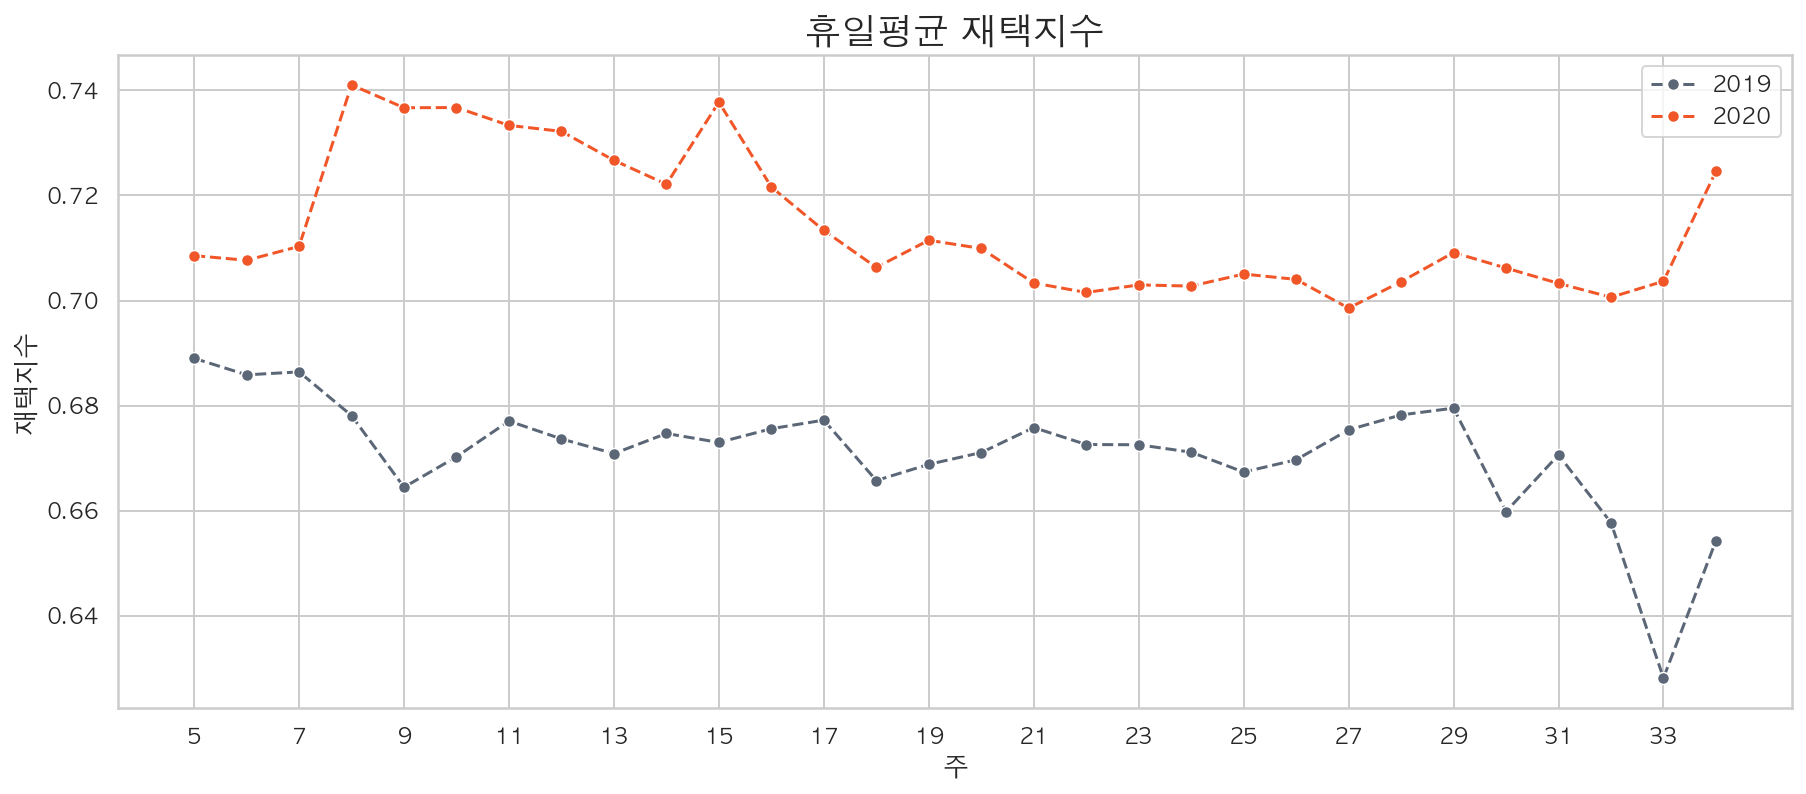

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

ax = sns.lineplot(data=home_index, x=home_index.index, y='평일평균_19', linestyle='--', color='#5b6777', marker='o')
ax = sns.lineplot(data=home_index, x=home_index.index, y='평일평균_20', linestyle='--', color='#f15628', marker='o')
ax.legend(['2019', '2020'])

plt.title('휴일평균 재택지수', fontsize = 18)
plt.xlabel('주', fontsize = 13)
plt.ylabel('재택지수', fontsize = 13)
plt.xticks(np.arange(5, 34, 2), np.arange(5, 34, 2))

plt.show()

##  휴일 평균 주택지수 그래프 (2019, 2020)

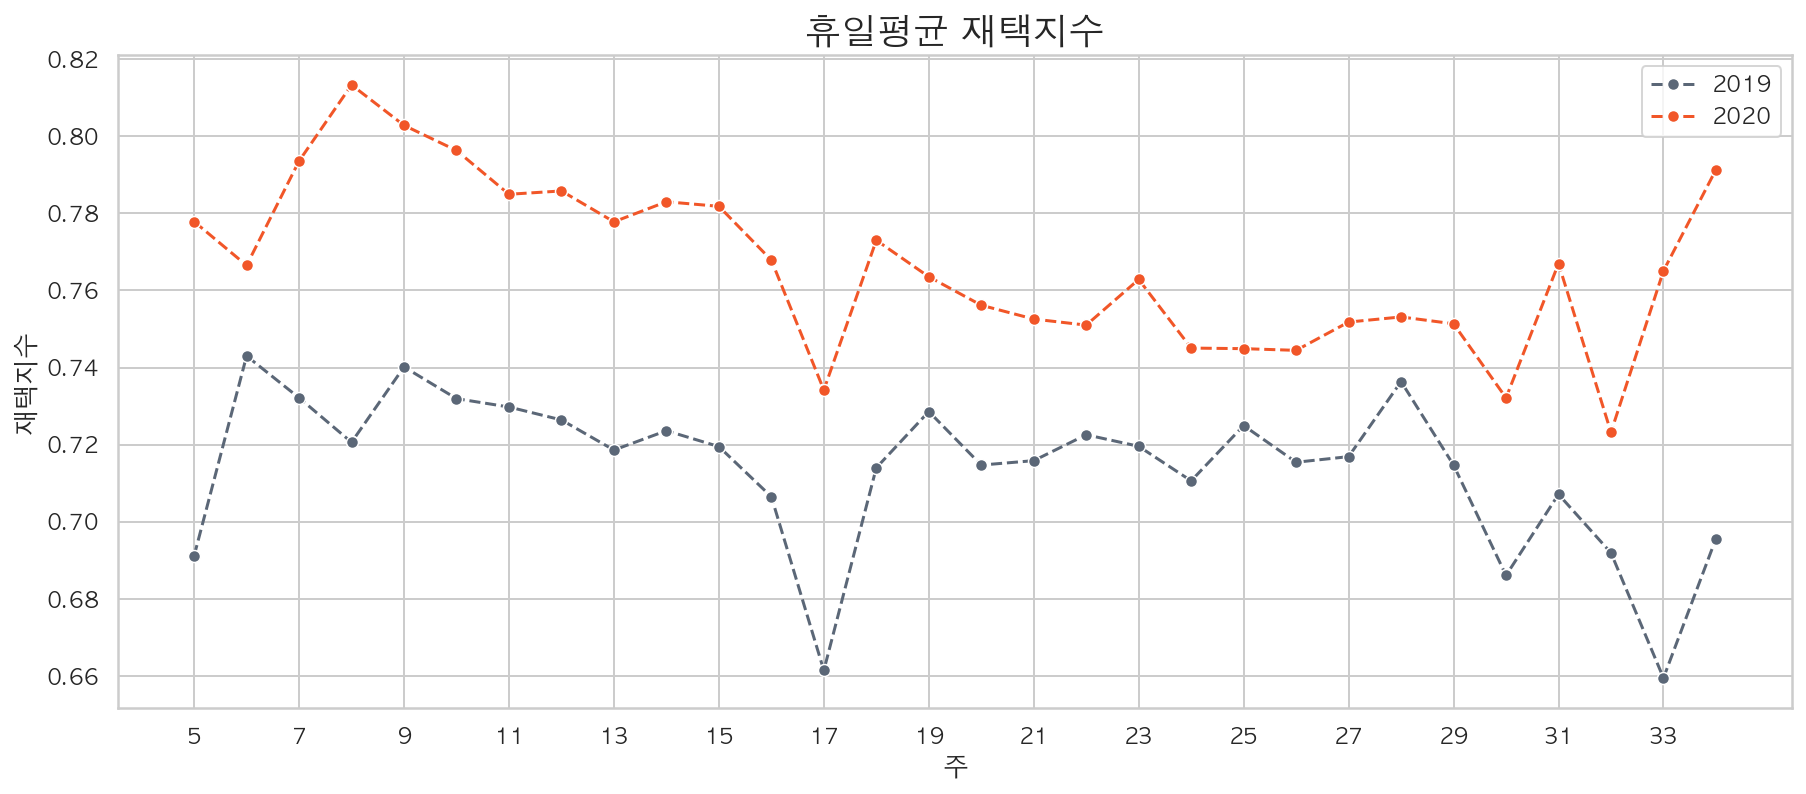

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

ax = sns.lineplot(data=home_index, x=home_index.index, y='휴일평균_19', linestyle='--', color='#5b6777', marker='o')
ax = sns.lineplot(data=home_index, x=home_index.index, y='휴일평균_20', linestyle='--', color='#f15628', marker='o')
ax.legend(['2019', '2020'])

plt.title('휴일평균 재택지수', fontsize = 18)
plt.xlabel('주', fontsize = 13)
plt.ylabel('재택지수', fontsize = 13)
plt.xticks(np.arange(5, 34, 2), np.arange(5, 34, 2))

plt.show()

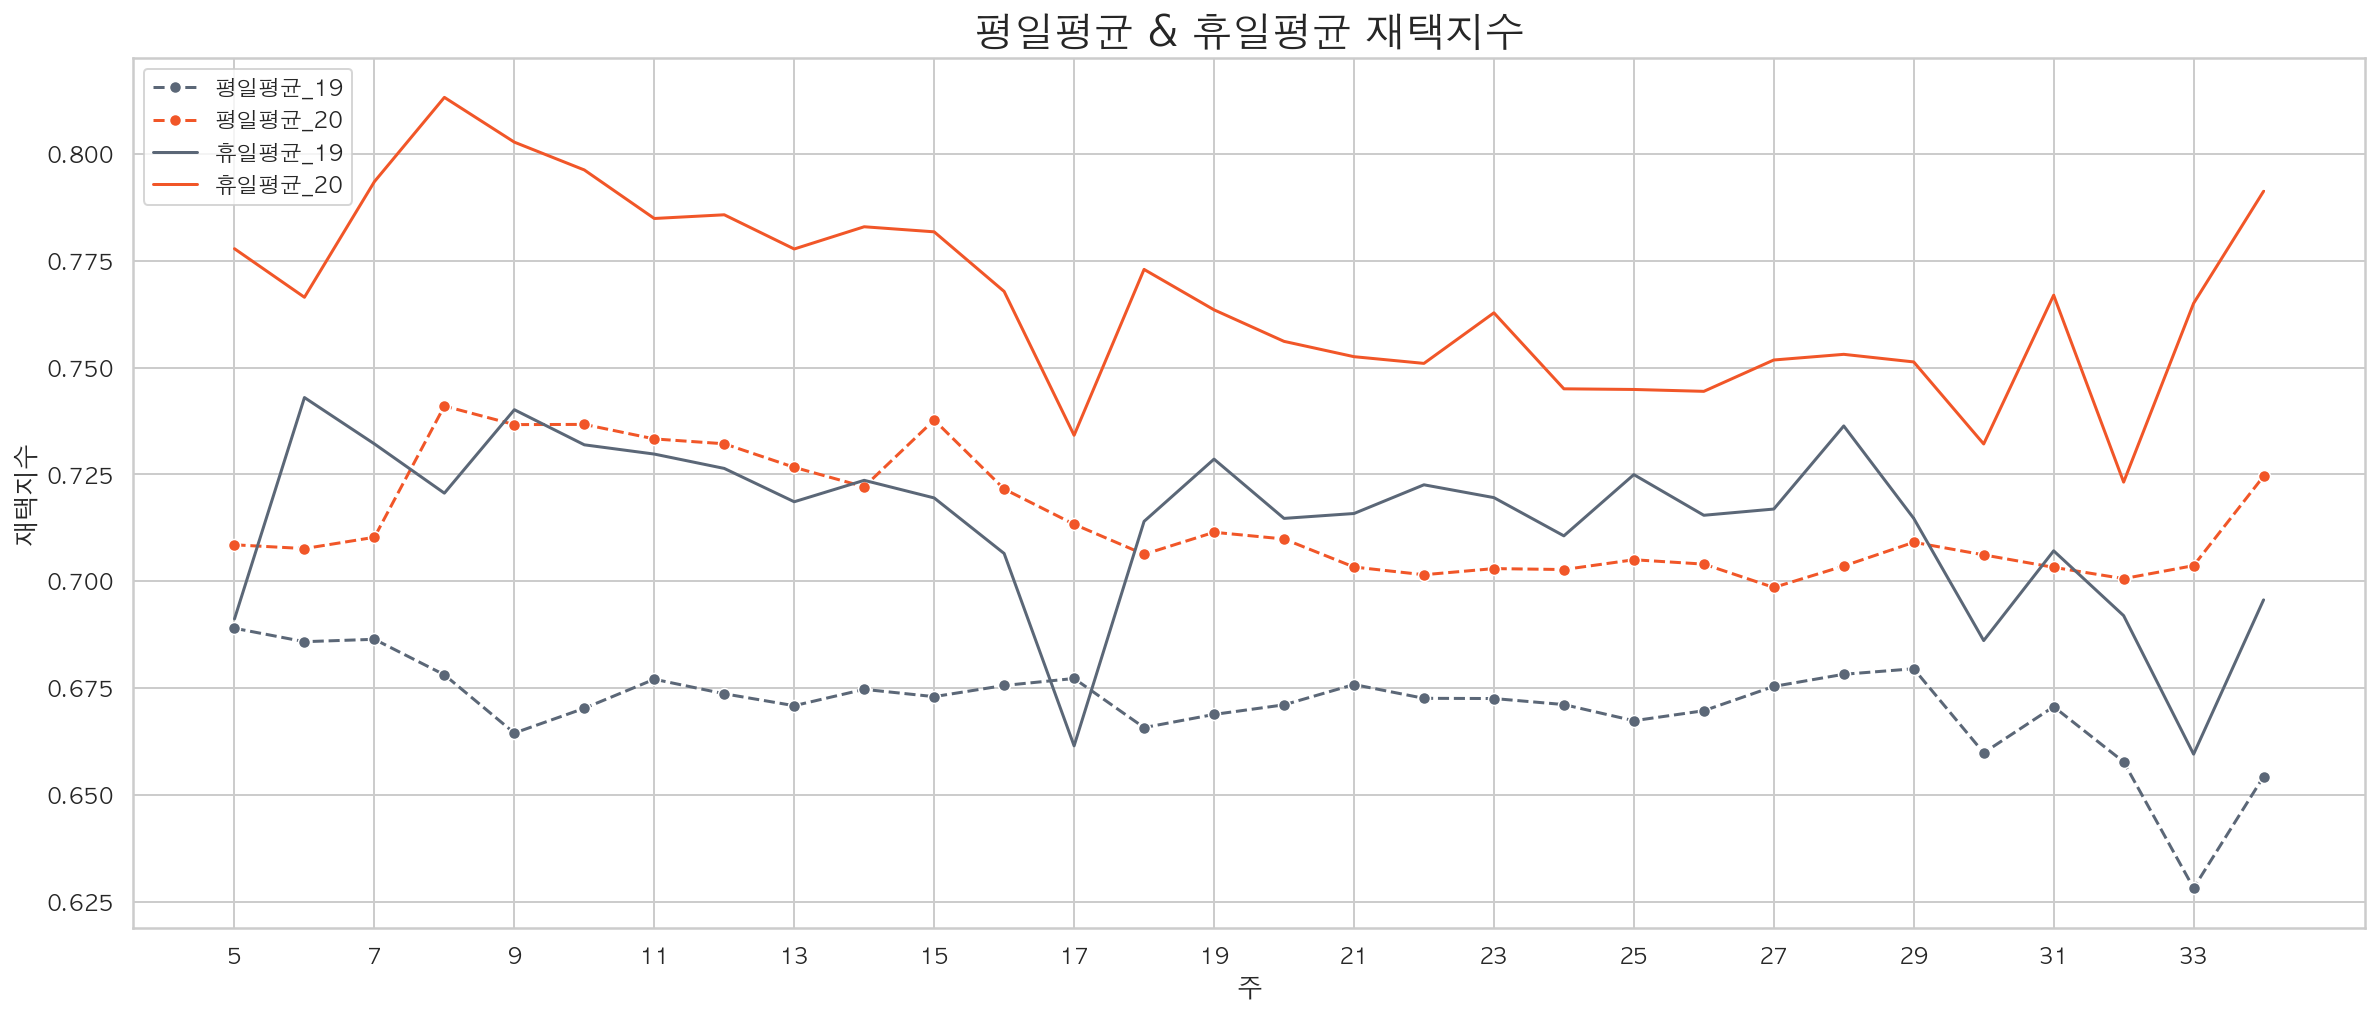

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

ax = sns.lineplot(data=home_index, x=home_index.index, y='평일평균_19', linestyle='--', color='#5b6777', marker='o')
ax = sns.lineplot(data=home_index, x=home_index.index, y='평일평균_20', linestyle='--', color='#f15628', marker='o')
ax = sns.lineplot(data=home_index, x=home_index.index, y='휴일평균_19', linestyle='-', color='#5b6777', marker=',')
ax = sns.lineplot(data=home_index, x=home_index.index, y='휴일평균_20', linestyle='-', color='#f15628', marker=',')
ax.legend(['평일평균_19', '평일평균_20', '휴일평균_19', '휴일평균_20'])

plt.title('평일평균 & 휴일평균 재택지수', fontsize = 20)
plt.xlabel('주', fontsize = 13)
plt.ylabel('재택지수', fontsize = 13)
plt.xticks(np.arange(5, 34, 2), np.arange(5, 34, 2))

plt.show()

평일 및 휴일 모두 집에서 보내는 시간이 더 길어진것을 확인, 17주차에 두드러지게 주택지수가 감소하는 모습을 확인할 수 있음